# SDSE Final Project Code - Group 10

In [1]:
# Package
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import seaborn

## Part 1: Cleaning and merging the 2 dataset

### 1.1: Cleaning and transforming the all_seasons dataset

In [2]:
df = pd.read_csv('all_seasons.csv')

In [3]:
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


Drop unnamed column

In [4]:
df.drop(columns='Unnamed: 0', inplace=True)

Transform season feature to be int

In [5]:
def season(year):
  year_parts = year.split('-')
  if year_parts[1] == '00' :
    return 2000
  else :
    return int(year_parts[0][:2] + year_parts[1])
  
# cleaning up season value to be int
df['season'] = df['season'].apply(season)

Adding salary cap

In [6]:
# salary numbers in 2022 dollars (from basketball reference)
salary_cap = {1997: 44402880,
              1998: 48285994,
              1999: 52688773,
              2000: 57763864,
              2001: 58657395,
              2002: 69132284,
              2003: 64048956,
              2004: 67907202,
              2005: 65719039,
              2006: 71839551,
              2007: 74973988,
              2008: 75594893,
              2009: 80023973,
              2010: 77414680,
              2011: 75491545,
              2012: 73970553,
              2013: 72903264,
              2014: 72519787,
              2015: 77841847,
              2016: 85323721,
              2017: 112368348,
              2018: 115455294,
              2019: 116573245,
              2020: 123384194,
              2021: 117838496,
              2022: 112414000,
              2023: 123655000}

# adding salary cap to each row
df['salary_cap'] = df['season'].map(salary_cap)

Modifying draft round and number

In [7]:
def draft_round(round):
  if round == 'Undrafted':
    round = 3
  return round

def draft_num(num):
  if num == 'Undrafted':
    num = 61
  return num

# cleaning up draft round and number
df['draft_round'] = df['draft_round'].apply(draft_round)
df['draft_number'] = df['draft_number'].apply(draft_num)


Region one-hot encoding

In [8]:
#Region encoding
Africa = ('DRC','Cabo Verde','Sudan (UK)','Republic of the Congo','Democratic Republic of the Congo' ,'Algeria','Angola','Benin','Botswana','Burkina','Burundi','Cameroon','Cape Verde','Central African Republic','Chad','Comoros','Congo','Congo, Democratic Republic of','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea-Bissau','Ivory Coast','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe')
Asia = ('South Korea' ,'Afghanistan','Bahrain','Bangladesh','Bhutan','Brunei','Burma (Myanmar)','Cambodia','China','East Timor','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','Korea, North','Korea, South','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Nepal','Oman','Pakistan','Philippines','Qatar','Russian Federation','Saudi Arabia','Singapore','Sri Lanka','Syria','Tajikistan','Thailand','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen')
Europe = ('Bosnia & Herzegovina','Bosnia','Great Britain','USSR','Scotland', 'Russia' ,'Yugoslavia' ,'England' ,'Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia and Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','Norway','Poland','Portugal','Romania','San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','United Kingdom','Vatican City', 'Serbia and Montenegro')
North_America = ('U.S. Virgin Islands','Puerto Rico' ,'Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago','USA', 'US Virgin Islands', 'St. Vincent & Grenadines')
South_America = ('Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru','Suriname','Uruguay','Venezuela')
Australia_Oceania = ('Australia','Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','New Zealand','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu')

def getRegion(country):
    if country in Africa:
        return 'africa'
    elif country in Asia:
        return 'asia'
    elif country in Europe:
        return 'europe'
    elif country in North_America:
        return 'north_america'
    elif country in South_America:
        return 'south_america'
    elif country in Australia_Oceania:
        return 'australia_oceania'
    else:
        return "other"
    
df['region'] = df['country'].apply(getRegion)

# one hot encoding of region
df['region'] = df['region'].astype(str)
encode_region = pd.get_dummies(df['region'])
df = pd.concat([df, encode_region], axis = 1)


Adding first season feature

In [9]:
# Compute First season
undrafted_first_season = df.groupby('player_name')['season'].min()

df['first_season'] = df['draft_year']

for i, row in df.iterrows():
    if row['draft_year'] != 'Undrafted' :
      year = row['draft_year']
    else :
      year = undrafted_first_season[row['player_name']]
    df.at[i,'first_season'] = year

Dropping useless features

In [10]:
df.drop(columns=['country', 'draft_year', 'region', 'college'], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        12844 non-null  object 
 1   team_abbreviation  12844 non-null  object 
 2   age                12844 non-null  float64
 3   player_height      12844 non-null  float64
 4   player_weight      12844 non-null  float64
 5   draft_round        12844 non-null  object 
 6   draft_number       12844 non-null  object 
 7   gp                 12844 non-null  int64  
 8   pts                12844 non-null  float64
 9   reb                12844 non-null  float64
 10  ast                12844 non-null  float64
 11  net_rating         12844 non-null  float64
 12  oreb_pct           12844 non-null  float64
 13  dreb_pct           12844 non-null  float64
 14  usg_pct            12844 non-null  float64
 15  ts_pct             12844 non-null  float64
 16  ast_pct            128

Removing data before 2006 as the salaries data we have are after 2006

In [12]:
df = df[df['season']>=2006]

Adapting team abreviation with the other salaries dataset

In [13]:
#dict of team name
team_name = {'ATL': 'ATL',
 'BKN': 'BKN',
 'BOS': 'BOS',
 'BRK': 'BKN',
 'CHA': 'CHA',
 'CHI': 'CHI',
 'CHO': 'CHA',
 'CLE': 'CLE',
 'DAL': 'DAL',
 'DEN': 'DEN',
 'DET': 'DET',
 'GSW': 'GSW',
 'HOU': 'HOU',
 'IND': 'IND',
 'LAC': 'LAC',
 'LAL': 'LAL',
 'MEM': 'MEM',
 'MIA': 'MIA',
 'MIL': 'MIL',
 'MIN': 'MIN',
 'NJN': 'BKN',
 'NOH': 'NOP',
 'NOK': 'NOP',
 'NOP': 'NOP',
 'NYK': 'NYK',
 'OKC': 'OKC',
 'ORL': 'ORL',
 'PHI': 'PHI',
 'PHO': 'PHX',
 'PHX': 'PHX',
 'POR': 'POR',
 'SAC': 'SAC',
 'SAS': 'SAS',
 'SEA': 'OKC',
 'TOR': 'TOR',
 'UTA': 'UTA',
 'WAS': 'WAS'}

def team_rename (team_abbreviation) :
  return team_name[team_abbreviation]

df['team_abbreviation'] = df['team_abbreviation'].apply(team_rename)

One-hot encoding of the team

In [14]:
# encoding of teams to players
df['season'] = df['season'].astype(str)
encode_team = pd.get_dummies(df['team_abbreviation'])
df = pd.concat([df, encode_team], axis = 1)

Modifying the type of the features

In [15]:
df['draft_round'] = df['draft_round'].astype(int)
df['draft_number'] = df['draft_number'].astype(int)
df['season'] = df['season'].astype(int)
df['first_season'] = df['first_season'].astype(int)

Computing experience of the player (current season - first season)

In [16]:
df['experience'] = df['season'] - df['first_season']

Dropping the few negative experience player

In [17]:
df = df[df['experience']>=0]

Dropping useless column

In [18]:
df.drop(columns=['first_season'], inplace=True)

Creating a unique key to join the 2 dataset: team + season + player_name

In [19]:
#Key for joining datasets
df['key'] = df['team_abbreviation'] + df['season'].astype(str) + df['player_name']

### 1.2: Cleaning and transforming the salaries dataset

In [20]:
df_salaries = pd.read_csv('salaries.csv')

In [21]:
df_salaries.head()

,Unnamed: 0,team,season,player_name,salary
0,0,ATL,2006,Al Harrington,6957500.0
1,1,ATL,2006,Donta Smith,641748.0
2,2,ATL,2006,Esteban Batista,398762.0
3,3,ATL,2006,Jason Collier,1650000.0
4,4,ATL,2006,Joe Johnson,12000000.0


Dropping the unnamed column

In [22]:
df_salaries.drop(columns=['Unnamed: 0'], inplace=True)

Uniformazing the team name with the former dataset

In [23]:
df_salaries['team'] = df_salaries['team'].apply(team_rename)

Creating the key to merge the dataset

In [24]:
df_salaries['key'] = df_salaries['team'] + df_salaries['season'].astype(str) + df_salaries['player_name']

Dropping the useless features (included in the key)

In [25]:
df_salaries.drop(columns=['team','season','player_name'],inplace=True)

In [26]:
df_salaries.head()

,salary,key
0,6957500.0,ATL2006Al Harrington
1,641748.0,ATL2006Donta Smith
2,398762.0,ATL2006Esteban Batista
3,1650000.0,ATL2006Jason Collier
4,12000000.0,ATL2006Joe Johnson


### 1.3: Merging the dataset

In [27]:
df_merged = df.merge(df_salaries, on='key', how='left')

Dropping Nan values

In [28]:
df_merged.dropna(inplace=True)

Dropping useless columns

In [29]:
df_merged.drop(columns=['key','team_abbreviation'], inplace=True)

In [30]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7554 entries, 0 to 8871
Data columns (total 56 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        7554 non-null   object 
 1   age                7554 non-null   float64
 2   player_height      7554 non-null   float64
 3   player_weight      7554 non-null   float64
 4   draft_round        7554 non-null   int32  
 5   draft_number       7554 non-null   int32  
 6   gp                 7554 non-null   int64  
 7   pts                7554 non-null   float64
 8   reb                7554 non-null   float64
 9   ast                7554 non-null   float64
 10  net_rating         7554 non-null   float64
 11  oreb_pct           7554 non-null   float64
 12  dreb_pct           7554 non-null   float64
 13  usg_pct            7554 non-null   float64
 14  ts_pct             7554 non-null   float64
 15  ast_pct            7554 non-null   float64
 16  season             7554 non-n

Saving the newly created dataset

In [31]:
#df_merged.to_csv('nba_dataset.csv')

## Part 2: Normalizing and Training our regressions models

### 2.1 Normalizing the dataset

In [32]:
df = pd.read_csv('nba_dataset.csv')
df.head()

,Unnamed: 0,player_name,age,player_height,player_weight,draft_round,draft_number,gp,pts,reb,...,PHI,PHX,POR,SAC,SAS,TOR,UTA,WAS,experience,salary
0,0,Tyronn Lue,29.0,182.88,80.739376,1,23,51,11.0,1.6,...,0,0,0,0,0,0,0,0,8,3500000.0
1,1,T.J. Ford,23.0,182.88,74.842680,1,8,72,12.2,4.3,...,0,0,0,0,0,0,0,0,3,2303040.0
2,2,Tayshaun Prince,26.0,205.74,97.522280,1,23,82,14.1,4.2,...,0,0,0,0,0,0,0,0,4,1763115.0
3,3,Terence Morris,27.0,205.74,100.243832,2,33,22,1.6,1.7,...,0,0,0,0,0,0,0,0,5,835810.0
4,4,Theo Ratliff,33.0,208.28,106.594120,1,18,55,4.9,5.1,...,0,0,1,0,0,0,0,0,11,11666666.0


Keeping only numerical values and splitting the salaries from the rest of the dataset

In [33]:
df_reg = df.iloc[:,2:]
df_x = df_reg.iloc[:,:-1]
df_y = df_reg.iloc[:,-1]

Separating dataset into training and test

In [34]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(df_x, df_y, test_size=0.2, random_state=1)

Normalize the input and output data

In [35]:
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
norm_train_X = scaler_x.fit_transform(train_X)

norm_test_X = scaler_x.transform(test_X)

mean_Y = np.mean(train_Y)
std_Y = np.std(train_Y)
norm_train_Y = (train_Y - mean_Y)/std_Y
norm_test_Y = (test_Y - mean_Y)/std_Y 

### 2.2 Linear regression

Basic Linear regression

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

In [37]:
model = LinearRegression()
model.fit(norm_train_X, norm_train_Y)

LinearRegression()

In [38]:
y_norm_pred = model.predict(norm_test_X)

In [39]:
y_pred = y_norm_pred*std_Y + mean_Y

In [40]:
# Calculating RMSE and R-squared values
rmse = mean_squared_error(test_Y, y_pred,squared=False)
r2 = r2_score(test_Y, y_pred)

# Displaying RMSE and R-squared values
print("RMSE:", rmse)
print("R-squared:", r2)

RMSE: 4372520.377889279
R-squared: 0.5715882803110683


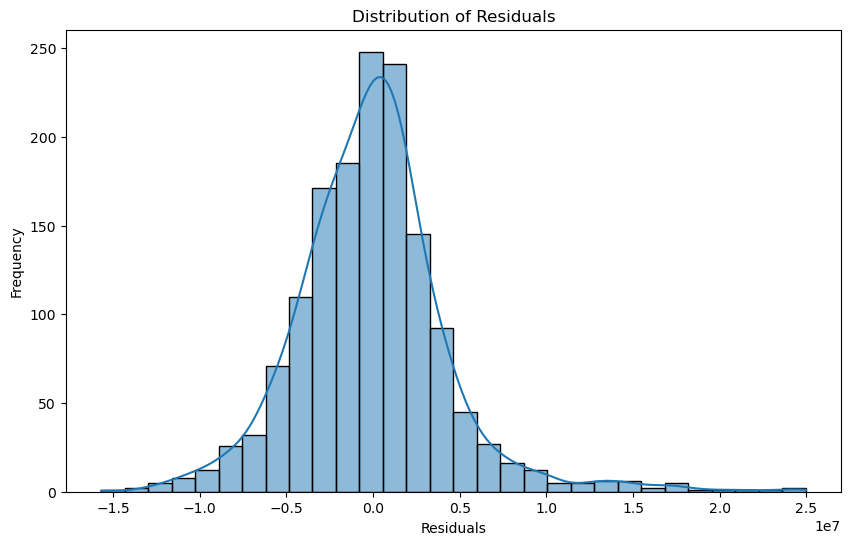

In [41]:
# Residuals Plot
residuals = test_Y - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

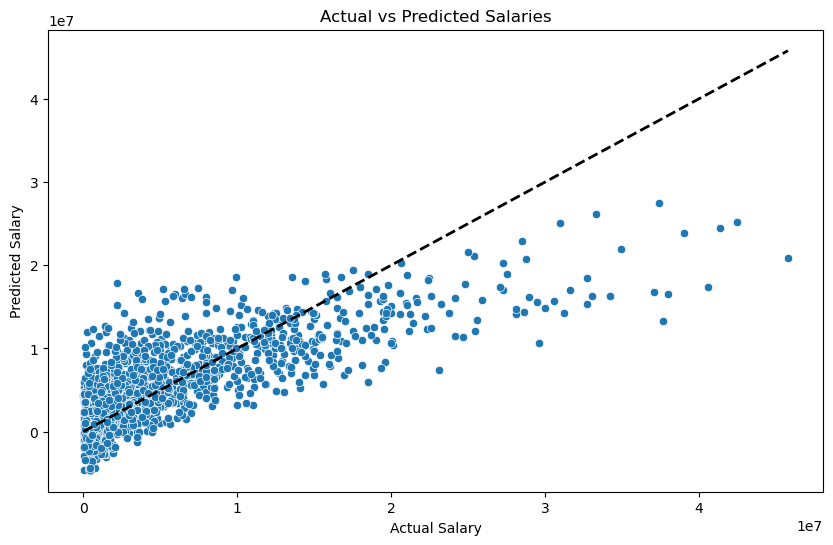

In [42]:
# Comparison Plot (Actual vs Predicted Salaries)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_Y, y=y_pred)
plt.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=2) # Diagonal line for reference
plt.title('Actual vs Predicted Salaries')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()


Forward Selection

In [43]:
# Forward Selection Function
def forward_selection(X_train, y_train, X_test, y_test):
    initial_features = X_train.columns.tolist()
    best_features = []
    remaining_features = initial_features.copy()
    current_score, best_new_score = float('inf'), float('inf')

    while remaining_features and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining_features:
            selected_features = best_features + [candidate]
            model = LinearRegression().fit(X_train[selected_features], y_train)
            predictions = model.predict(X_test[selected_features])
            score = mean_squared_error(y_test, predictions, squared=False)  # RMSE
            scores_with_candidates.append((score, candidate))

        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates[0]

        if best_new_score < current_score:
            remaining_features.remove(best_candidate)
            best_features.append(best_candidate)
            current_score = best_new_score

    return best_features, current_score

In [44]:
# Applying optimized backward selection
selected_features_opt_forward, final_rmse_opt_forward = forward_selection(train_X, train_Y, test_X, test_Y)

In [45]:
model_opt_forward = LinearRegression()
model_opt_forward.fit(train_X[selected_features_opt_forward], train_Y)

LinearRegression()

In [46]:
y_pred_forward = model_opt_forward.predict(test_X[selected_features_opt_forward])

In [47]:
# Calculating RMSE and R-squared values
rmse = mean_squared_error(test_Y, y_pred_forward,squared=False)
r2 = r2_score(test_Y, y_pred_forward)

# Displaying RMSE and R-squared values
print("RMSE:", rmse)
print("R-squared:", r2)

RMSE: 4345911.4888815535
R-squared: 0.5767865975354194


Backward Selection

In [48]:
# Optimized Backward Selection Function
def optimized_backward_selection(X_train, y_train, X_test, y_test):
    features = X_train.columns.tolist()
    best_features = features.copy()
    current_score = float('inf')

    while features:
        scores_with_candidates = []
        for feature in features:
            # Use cached model if available, else fit a new model
            if 'model_cache' not in locals():
                model_cache = {}
            model_key = tuple(sorted(set(best_features) - {feature}))
            if model_key not in model_cache:
                model_cache[model_key] = LinearRegression().fit(X_train[list(model_key)], y_train)
            model = model_cache[model_key]

            # Make predictions and calculate score
            predictions = model.predict(X_test[list(model_key)])
            score = mean_squared_error(y_test, predictions, squared=False)  # RMSE
            scores_with_candidates.append((score, feature))

        scores_with_candidates.sort()
        best_new_score, worst_feature = scores_with_candidates[0]

        # Stop if removing more features increases RMSE
        if best_new_score >= current_score:
            break

        # Update the current best score and features
        current_score = best_new_score
        features.remove(worst_feature)
        best_features = features.copy()

    return best_features, current_score

In [49]:
# Applying optimized backward selection
selected_features_opt_backward, final_rmse_opt_backward = optimized_backward_selection(train_X, train_Y, test_X, test_Y)

In [50]:
model_opt_backward = LinearRegression()
model_opt_backward.fit(train_X[selected_features_opt_backward], train_Y)

LinearRegression()

In [51]:
y_pred_backward = model_opt_backward.predict(test_X[selected_features_opt_backward])

In [52]:
# Calculating RMSE and R-squared values
rmse = mean_squared_error(test_Y, y_pred_backward,squared=False)
r2 = r2_score(test_Y, y_pred_backward)

# Displaying RMSE and R-squared values
print("RMSE:", rmse)
print("R-squared:", r2)

RMSE: 4372504.3597246
R-squared: 0.5715914191675235


### 2.3 Lasso regression

In [53]:
from sklearn.linear_model import LassoCV, Lasso

# Lasso Regression model with cross-validation
lasso_cv_model = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=5, random_state=1)
lasso_cv_model.fit(norm_train_X, norm_train_Y)

# Best alpha value
best_alpha = lasso_cv_model.alpha_

In [54]:
lasso_model = Lasso(alpha=best_alpha)

lasso_model.fit(norm_train_X, norm_train_Y)

y_norm_pred_lasso = lasso_model.predict(norm_test_X)

In [55]:
y_pred_lasso = y_norm_pred_lasso*std_Y + mean_Y

In [56]:
# Calculating RMSE and R-squared values
rmse_lasso = np.sqrt(mean_squared_error(test_Y, y_pred_lasso))
r2_lasso = r2_score(test_Y, y_pred_lasso)

# Print the best alpha value, RMSE, and R2 values
print("Best alpha (weight parameter):", best_alpha)
print("RMSE:", rmse_lasso)
print("R2:", r2_lasso)


Best alpha (weight parameter): 0.001
RMSE: 4370410.684867183
R2: 0.5720015884704746


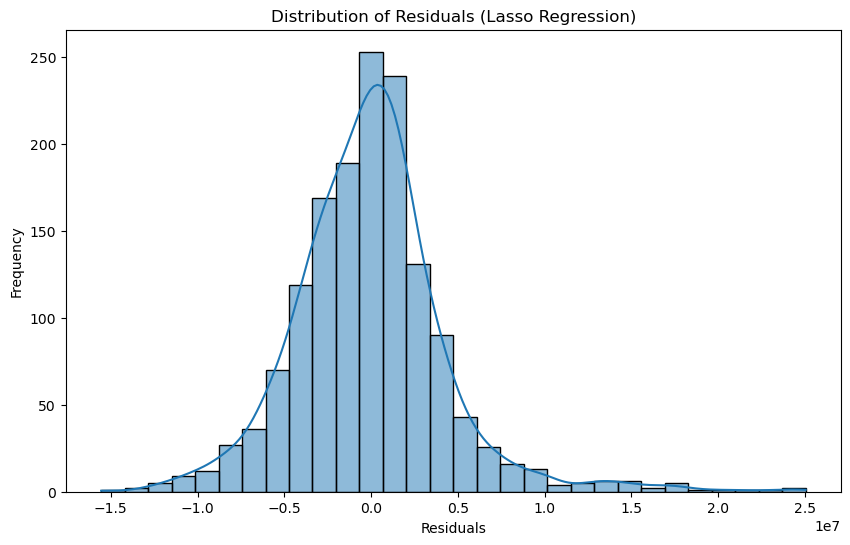

In [57]:
# Residuals Plot for Lasso Regression
residuals_lasso = test_Y - y_pred_lasso
plt.figure(figsize=(10, 6))
sns.histplot(residuals_lasso, kde=True, bins=30)
plt.title('Distribution of Residuals (Lasso Regression)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

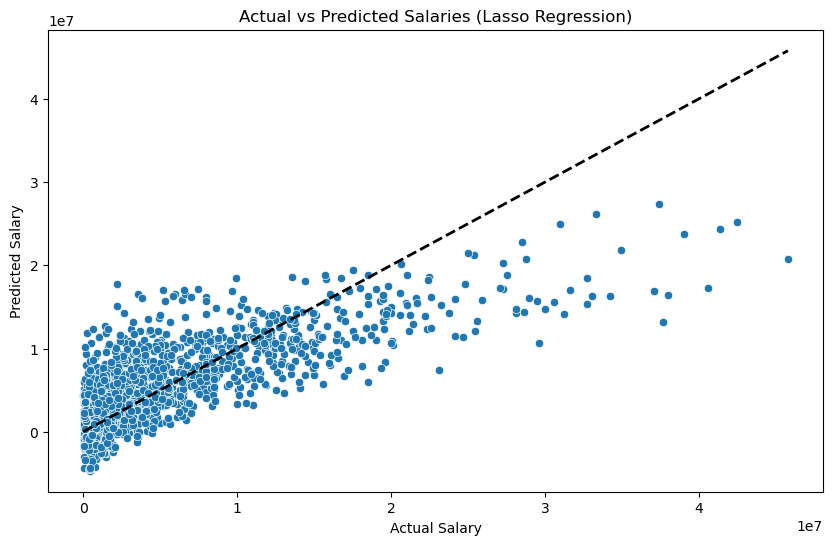

In [58]:
# Actual vs Predicted Salaries Plot for Lasso Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_Y, y=y_pred_lasso)
plt.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Salaries (Lasso Regression)')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()


### 2.4 Ridge regression

In [59]:
from sklearn.linear_model import RidgeCV, Ridge

# Ridge Regression model with cross-validation
ridge_cv_model = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=5)
ridge_cv_model.fit(norm_train_X, norm_train_Y)

# Best alpha value
best_alpha = ridge_cv_model.alpha_

In [60]:
ridge_model = Ridge(alpha=best_alpha)

ridge_model.fit(norm_train_X, norm_train_Y)

y_norm_pred_ridge = ridge_model.predict(norm_test_X)

In [61]:
y_pred_ridge = y_norm_pred_ridge*std_Y + mean_Y

In [62]:
# Calculating RMSE and R-squared values
rmse_ridge = np.sqrt(mean_squared_error(test_Y, y_pred_ridge))
r2_ridge = r2_score(test_Y, y_pred_ridge)

# Print the best alpha value, RMSE, and R2 values
print("Best alpha (weight parameter):", best_alpha)
print("RMSE:", rmse_ridge)
print("R2:", r2_ridge)

Best alpha (weight parameter): 1.0
RMSE: 4372412.212677973
R2: 0.5716094757164742


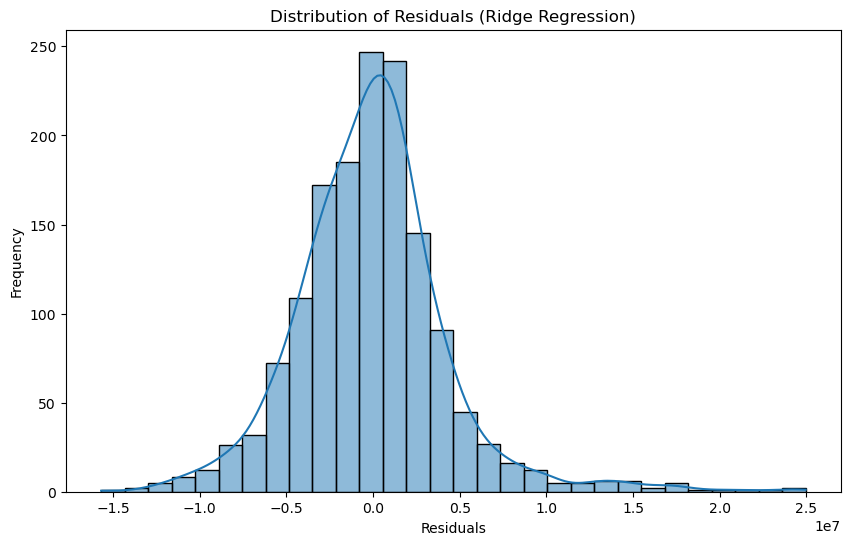

In [63]:
# Residuals Plot for Ridge Regression
residuals_ridge = test_Y - y_pred_ridge
plt.figure(figsize=(10, 6))
sns.histplot(residuals_ridge, kde=True, bins=30)
plt.title('Distribution of Residuals (Ridge Regression)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

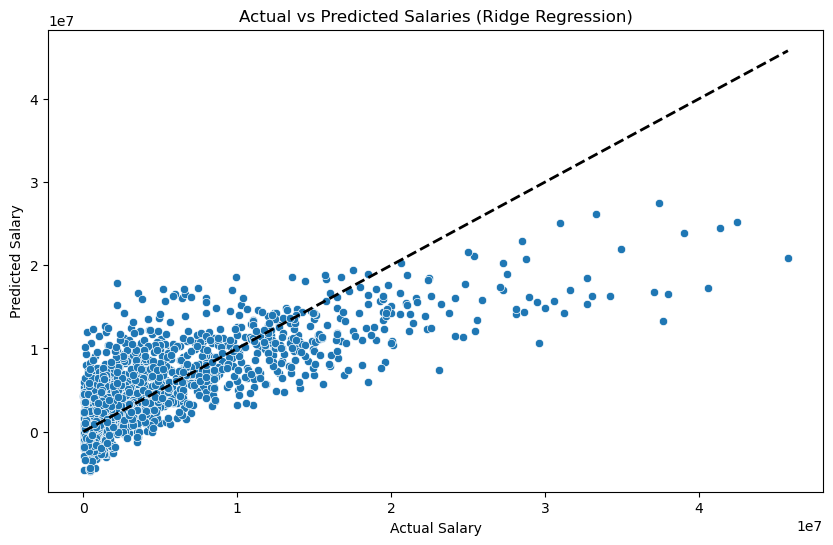

In [64]:
# Actual vs Predicted Salaries Plot for Ridge Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_Y, y=y_pred_ridge)
plt.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Salaries (Ridge Regression)')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

### 2.5 Decision Trees

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

grid = dict()
grid['max_depth'] = [i for i in range(1,21)]

# define the evaluation procedure
cv = KFold(n_splits=10, shuffle=True, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model,param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error', verbose=1)
# execute the grid search
grid_result = grid_search.fit(norm_train_X, norm_train_Y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 20 candidates, totalling 200 fits


Best: -0.308783 using {'max_depth': 6}
-0.699775 (0.085100) with: {'max_depth': 1}
-0.510738 (0.058131) with: {'max_depth': 2}
-0.399406 (0.046249) with: {'max_depth': 3}
-0.349717 (0.031971) with: {'max_depth': 4}
-0.310236 (0.030047) with: {'max_depth': 5}
-0.308783 (0.032846) with: {'max_depth': 6}
-0.316811 (0.035802) with: {'max_depth': 7}
-0.332422 (0.040063) with: {'max_depth': 8}
-0.365316 (0.051246) with: {'max_depth': 9}
-0.396484 (0.059106) with: {'max_depth': 10}
-0.390184 (0.045008) with: {'max_depth': 11}
-0.412087 (0.060088) with: {'max_depth': 12}
-0.418388 (0.048913) with: {'max_depth': 13}
-0.435794 (0.057532) with: {'max_depth': 14}
-0.439098 (0.046965) with: {'max_depth': 15}
-0.434331 (0.043942) with: {'max_depth': 16}
-0.460840 (0.056088) with: {'max_depth': 17}
-0.459851 (0.055096) with: {'max_depth': 18}
-0.457369 (0.059055) with: {'max_depth': 19}
-0.456791 (0.050165) with: {'max_depth': 20}


In [66]:
best_parameters = {'max_depth': 5}
best_model = DecisionTreeRegressor(max_depth=best_parameters['max_depth'], random_state=1)

In [67]:
best_model.fit(norm_train_X, norm_train_Y)
norm_pred_Y = best_model.predict(norm_test_X)
pred_Y = norm_pred_Y*std_Y+mean_Y

In [68]:
rmse = mean_squared_error(test_Y, pred_Y, squared=False)
r2 = r2_score(test_Y, pred_Y)


print('RMSE: ' + str(round(rmse, 0)))
print('R^2: ' + str(r2))

RMSE: 3755833.0
R^2: 0.6839104210490907


Text(0.5, 1.0, 'Feature Importance')

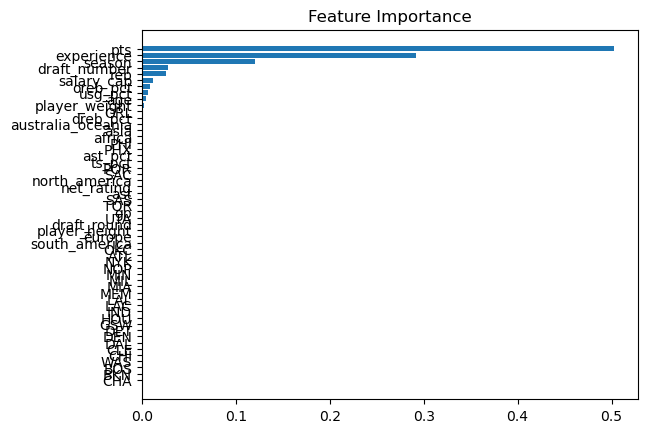

In [69]:
# most important features in predicting salaries
feature_importance = best_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure()
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_reg.columns)[sorted_idx])
plt.title("Feature Importance")

### 2.6 Random Forest

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

grid = dict()
grid['n_estimators'] = [10, 100, 500, 1000]

# define the evaluation procedure
cv = KFold(n_splits=5, shuffle=True, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model,param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error', verbose=1)
# execute the grid search
grid_result = grid_search.fit(norm_train_X, norm_train_Y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best: -0.220384 using {'n_estimators': 1000}
-0.241947 (0.017357) with: {'n_estimators': 10}
-0.223841 (0.019186) with: {'n_estimators': 100}
-0.221249 (0.018369) with: {'n_estimators': 500}
-0.220384 (0.017607) with: {'n_estimators': 1000}


In [7]:
best_parameters = {'n_estimators': 1000}
best_model = RandomForestRegressor(n_estimators=best_parameters['n_estimators'], random_state=1)

In [8]:
best_model.fit(norm_train_X, norm_train_Y)
norm_pred_Y = best_model.predict(norm_test_X)
pred_Y = norm_pred_Y*std_Y+mean_Y

In [11]:
rmse = mean_squared_error(test_Y, pred_Y, squared=False)
r2 = r2_score(test_Y, pred_Y)


print('RMSE: ' + str(round(rmse, 0)))
print('R^2: ' + str(r2))

RMSE: 3148041.0
R^2: 0.7779358479871278


Text(0.5, 1.0, 'Feature Importance')

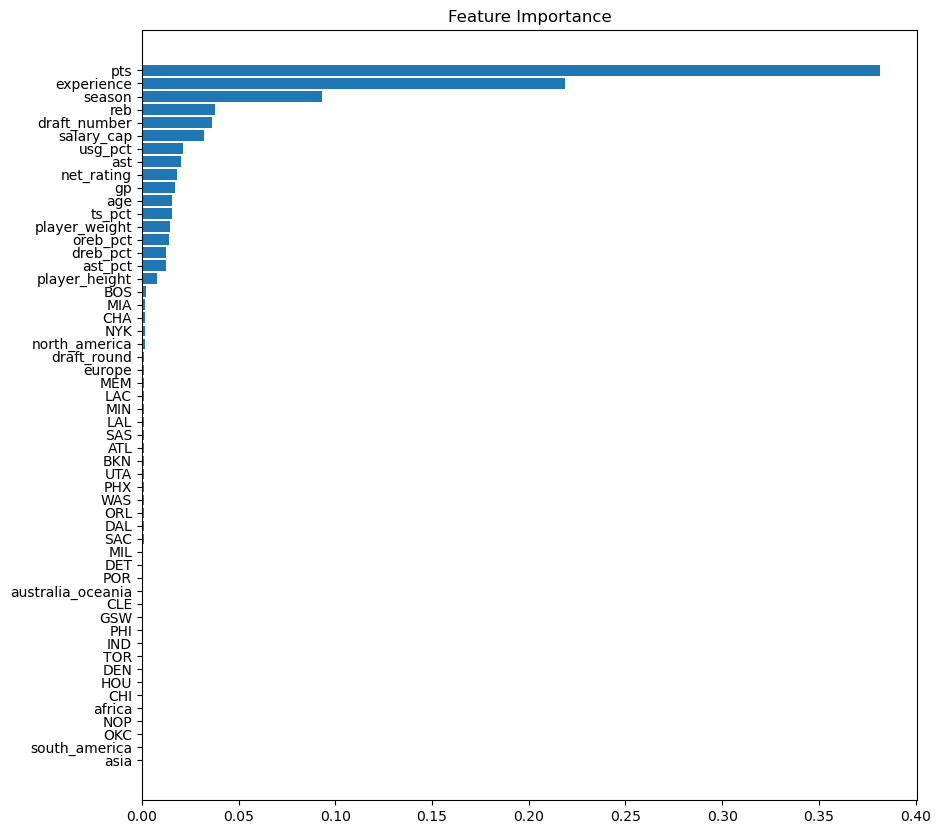

In [20]:
# most important features in predicting salaries
feature_importance = best_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_reg.columns)[sorted_idx], fontsize=10)
plt.title("Feature Importance")

### 2.7 Gradient Boost

In [21]:
# Gradient Boost (regular and normalized data)
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

model = ensemble.GradientBoostingRegressor()
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# define the evaluation procedure
cv = KFold(n_splits=10, shuffle=True, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error', verbose=1)
# execute the grid search
grid_result = grid_search.fit(norm_train_X, norm_train_Y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best: -0.236844 using {'learning_rate': 0.1, 'n_estimators': 500}
-0.999244 (0.127580) with: {'learning_rate': 0.0001, 'n_estimators': 10}
-0.994434 (0.126995) with: {'learning_rate': 0.0001, 'n_estimators': 50}
-0.988475 (0.126269) with: {'learning_rate': 0.0001, 'n_estimators': 100}
-0.942784 (0.120740) with: {'learning_rate': 0.0001, 'n_estimators': 500}
-0.988471 (0.126269) with: {'learning_rate': 0.001, 'n_estimators': 10}
-0.942758 (0.120736) with: {'learning_rate': 0.001, 'n_estimators': 50}
-0.890376 (0.114240) with: {'learning_rate': 0.001, 'n_estimators': 100}
-0.602336 (0.074768) with: {'learning_rate': 0.001, 'n_estimators': 500}
-0.889898 (0.114166) with: {'learning_rate': 0.01, 'n_estimators': 10}
-0.601237 (0.074647) with: {'learning_rate': 0.01, 'n_estimators': 50}
-0.433373 (0.053104) with: {'learning_rate': 0.01, 'n_estimators': 100}
-0.252475 (0.025222) with: {'learning_rate': 0.01, 'n_estimators': 500}
-

In [22]:
best_params = {
    "n_estimators": 500,
    "learning_rate": 0.1,
}

grad_boost = ensemble.GradientBoostingRegressor(n_estimators = best_params['n_estimators'], learning_rate = best_params['learning_rate'], random_state = 1)
grad_boost.fit(train_X, train_Y)

grad_boost_norm = ensemble.GradientBoostingRegressor(n_estimators = best_params['n_estimators'], learning_rate = best_params['learning_rate'], random_state = 1)
grad_boost_norm.fit(norm_train_X, norm_train_Y)

GradientBoostingRegressor(n_estimators=500, random_state=1)

In [31]:
# prediction and RMSE
predY = grad_boost.predict(test_X)
norm_predY = grad_boost_norm.predict(norm_test_X)
predY_from_norm = norm_predY*std_Y + mean_Y

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

mse_grad = mean_squared_error(test_Y, predY, squared = False)
mse_grad_from_norm = mean_squared_error(test_Y, predY_from_norm, squared = False)
grad_r2 = r2_score(test_Y, predY)
grad_norm_r2 = r2_score(test_Y, predY_from_norm)


print('RMSE gradient boost: ' + str(round(mse_grad, 0)))
print('RMSE gradient boost (from normalized data): ' + str(round(mse_grad_from_norm, 0)))
print('R^2: ' + str(grad_r2))
print('R^2 (from normalized data): ' + str(grad_norm_r2))


RMSE gradient boost: 3196291.0
RMSE gradient boost (from normalized data): 3199557.0
R^2: 0.77107654877796
R^2 (from normalized data): 0.7706084421230355


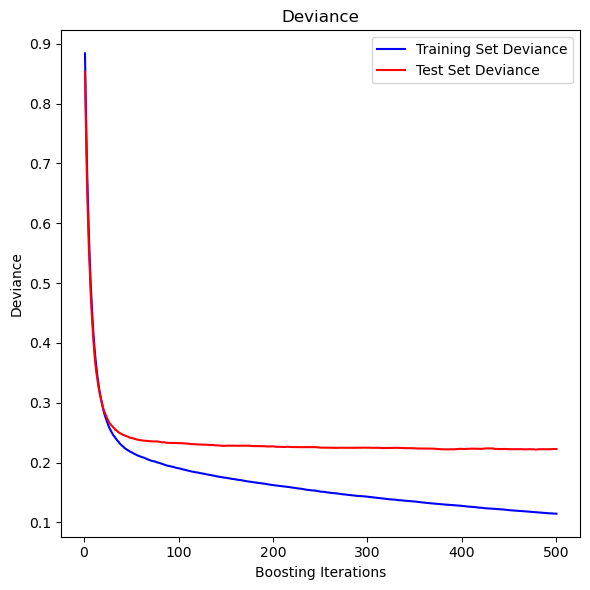

In [28]:
# plotting training deviance
import matplotlib.pyplot as plt

norm_test_Y = (test_Y - mean_Y)/std_Y

test_score = np.zeros((best_params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(grad_boost_norm.staged_predict(norm_test_X)):
    test_score[i] = mean_squared_error(norm_test_Y, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(np.arange(best_params["n_estimators"]) + 1, grad_boost_norm.train_score_, "b-", label="Training Set Deviance")
plt.plot(np.arange(best_params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance")
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

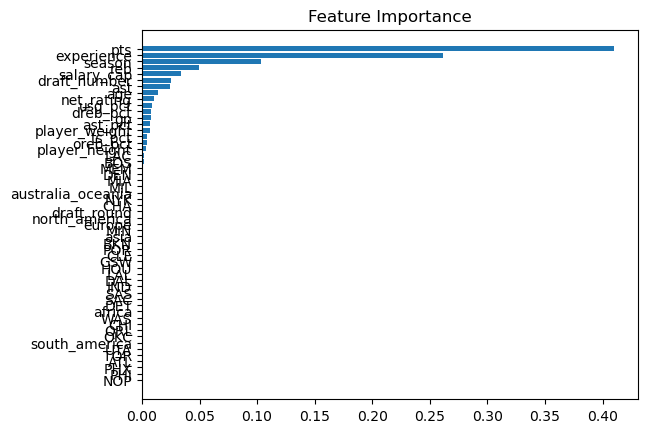

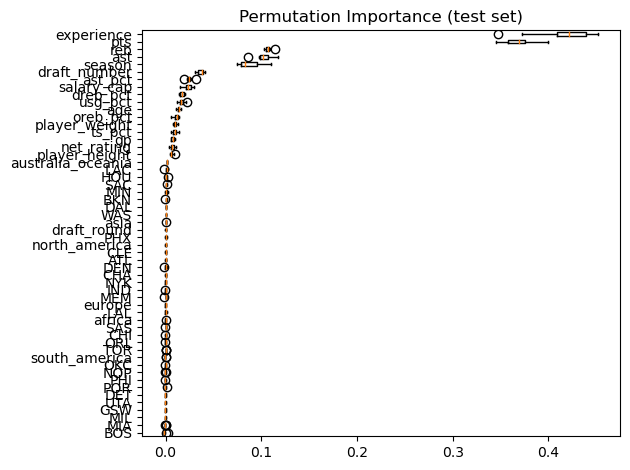

In [30]:
# most important features in predicting salaries
from sklearn.inspection import permutation_importance

feature_importance = grad_boost.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure()
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_reg.columns)[sorted_idx])
plt.title("Feature Importance")

result = permutation_importance(grad_boost, test_X, test_Y, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig = plt.figure()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(df_reg.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

### 2.8 Adaboost

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor()

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# define the evaluation procedure
cv = KFold(n_splits=10, shuffle=True, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model,param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error', verbose=1)
# execute the grid search
grid_result = grid_search.fit(norm_train_X, norm_train_Y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best: -0.335386 using {'learning_rate': 0.01, 'n_estimators': 500}
-0.386984 (0.048256) with: {'learning_rate': 0.0001, 'n_estimators': 10}
-0.386600 (0.046654) with: {'learning_rate': 0.0001, 'n_estimators': 50}
-0.388448 (0.047683) with: {'learning_rate': 0.0001, 'n_estimators': 100}
-0.386188 (0.046975) with: {'learning_rate': 0.0001, 'n_estimators': 500}
-0.390836 (0.047760) with: {'learning_rate': 0.001, 'n_estimators': 10}
-0.385071 (0.046182) with: {'learning_rate': 0.001, 'n_estimators': 50}
-0.386745 (0.049222) with: {'learning_rate': 0.001, 'n_estimators': 100}
-0.380455 (0.047505) with: {'learning_rate': 0.001, 'n_estimators': 500}
-0.387932 (0.046826) with: {'learning_rate': 0.01, 'n_estimators': 10}
-0.380305 (0.046431) with: {'learning_rate': 0.01, 'n_estimators': 50}
-0.374020 (0.042306) with: {'learning_rate': 0.01, 'n_estimators': 100}
-0.335386 (0.029484) with: {'learning_rate': 0.01, 'n_estimators': 500}


In [72]:
best_parameters = {'learning_rate': 0.01, 'n_estimators': 500}
best_model = AdaBoostRegressor(n_estimators=best_parameters['n_estimators'], learning_rate=best_parameters['learning_rate'], random_state=1)

In [73]:
best_model.fit(norm_train_X, norm_train_Y)
norm_pred_Y = best_model.predict(norm_test_X)
pred_Y = norm_pred_Y*std_Y+mean_Y

In [74]:
rmse = mean_squared_error(test_Y, pred_Y, squared=False)
r2 = r2_score(test_Y, pred_Y)


print('RMSE: ' + str(round(rmse, 0)))
print('R^2: ' + str(r2))

RMSE: 3814860.0
R^2: 0.6738970192947397


Text(0.5, 1.0, 'Feature Importance')

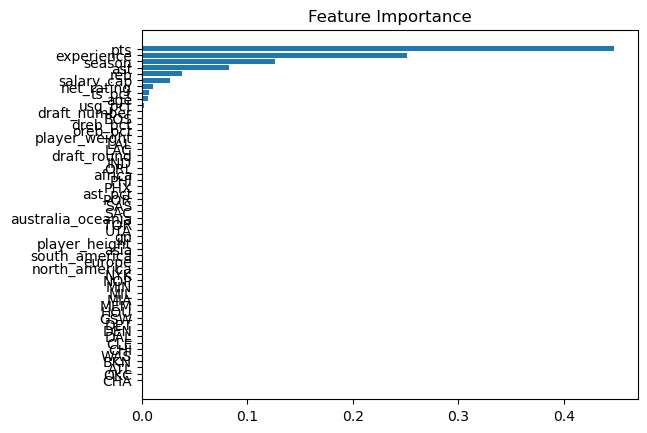

In [75]:
# most important features in predicting salaries
feature_importance = best_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure()
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_reg.columns)[sorted_idx])
plt.title("Feature Importance")

### 2.9 Neural Networks

In [96]:
import keras
import tensorflow as tf
from keras import backend as K

# Create model

model = keras.Sequential([
    keras.layers.Dense(20, activation=K.elu, input_shape=[54],  kernel_initializer='normal'),
    keras.layers.Dense(15, activation=K.elu,  kernel_initializer='normal'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation=K.elu, kernel_initializer='normal'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(1,  kernel_initializer='normal')
  ])


In [97]:
# Compile model

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                1100      
                                                                 
 dense_9 (Dense)             (None, 15)                315       
                                                                 
 dropout_4 (Dropout)         (None, 15)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                160       
                                                                 
 dropout_5 (Dropout)         (None, 10)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1586 (6.20 KB)
Trainable params: 1586 (6

In [98]:
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='val_loss',
                    mode='min',  verbose=1, save_best_only=True)

model_train = model.fit(norm_train_X, norm_train_Y, epochs=200, verbose=1, validation_split=0.2, shuffle=True)

Epoch 1/200
149/149 [==============================] - 1s 4ms/step - loss: 0.7196 - val_loss: 0.4875
Epoch 2/200
149/149 [==============================] - 0s 2ms/step - loss: 0.4951 - val_loss: 0.4067
Epoch 3/200
149/149 [==============================] - 0s 2ms/step - loss: 0.4466 - val_loss: 0.3729
Epoch 4/200
149/149 [==============================] - 0s 3ms/step - loss: 0.4345 - val_loss: 0.3444
Epoch 5/200
149/149 [==============================] - 0s 3ms/step - loss: 0.4077 - val_loss: 0.3363
Epoch 6/200
149/149 [==============================] - 0s 3ms/step - loss: 0.3717 - val_loss: 0.3097
Epoch 7/200
149/149 [==============================] - 0s 2ms/step - loss: 0.3705 - val_loss: 0.3041
Epoch 8/200
149/149 [==============================] - 0s 3ms/step - loss: 0.3619 - val_loss: 0.2764
Epoch 9/200
149/149 [==============================] - 0s 2ms/step - loss: 0.3555 - val_loss: 0.2780
Epoch 10/200
149/149 [==============================] - 0s 2ms/step - loss: 0.3515 - val_lo

In [99]:
loss_hist = model_train.history['val_loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(model_train.history['val_loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

best epoch =  46
smallest loss = 0.2412082850933075


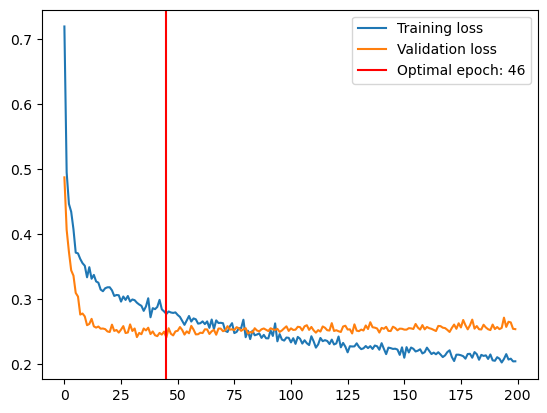

Opt epoch, training loss 0.2773381471633911, val loss 0.2412082850933075


In [100]:
epoch = [i for i in range(len(model_train.history['loss']))]

train_loss = np.array(model_train.history['loss'])
val_loss = np.array(model_train.history['val_loss'])

opt_epoch = np.argmin(val_loss)

plt.plot(epoch, train_loss, label='Training loss')
plt.plot(epoch, val_loss, label='Validation loss')
plt.axvline(opt_epoch, color='r', label= f'Optimal epoch: {opt_epoch+1}')

plt.legend()

plt.show()
print(f'Opt epoch, training loss {train_loss[opt_epoch]}, val loss {val_loss[opt_epoch]}')

In [101]:
norm_pred_Y_2 = model.predict(norm_test_X)
pred_Y_2 = norm_pred_Y_2*std_Y+mean_Y
rmse = mean_squared_error(test_Y, pred_Y_2, squared=False)
r2 = r2_score(test_Y, pred_Y_2)

print('RMSE: ' + str(round(rmse, 0)))
print('R^2: ' + str(r2))

47/47 [==============================] - 0s 1ms/step
RMSE: 3480008.0
R^2: 0.7286322995729336
